In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_dodge_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_void_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_sheep_fear.wav
/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set d

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [3]:
paths = []
labels = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print("dataset is loaded")

dataset is loaded


In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [6]:
#create a dataframe
df = pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df["label"].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

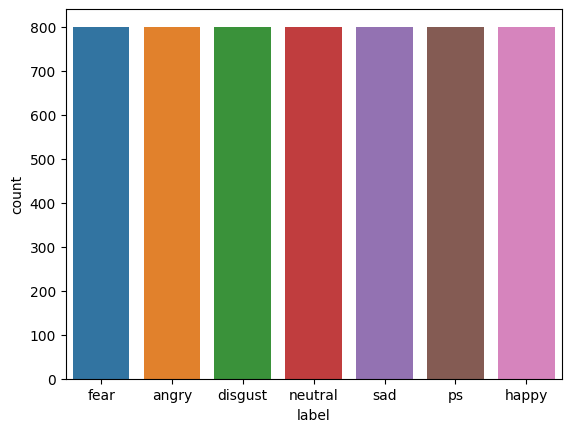

In [8]:
sns.countplot(data = df, x = "label")
plt.show()

In [9]:
def waveplot(data, sample_rate, emotion):
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size = 20)
    
    librosa.display.waveshow(y = data, sr = sample_rate)
    plt.show()

In [10]:
def spectogram(data, sr, emotion):
    
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    
    plt.figure(figsize = (10, 4))
    plt.title(emotion, size = 20)
    
    librosa.display.specshow(data = xdb, sr = sr, x_axis = "time", y_axis = "hz")
    plt.show()

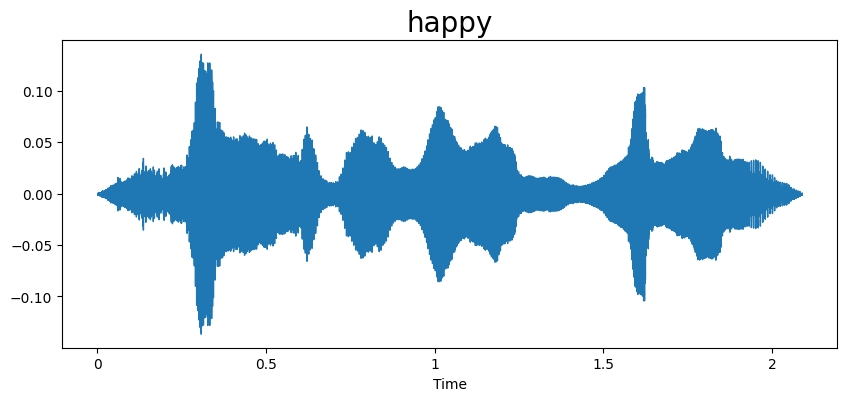

In [11]:
emotion = "happy"
path = df["speech"][df["label"] == emotion].reset_index()["speech"][259]
data, sample_rate = librosa.load(path)

waveplot(data, sample_rate, emotion)


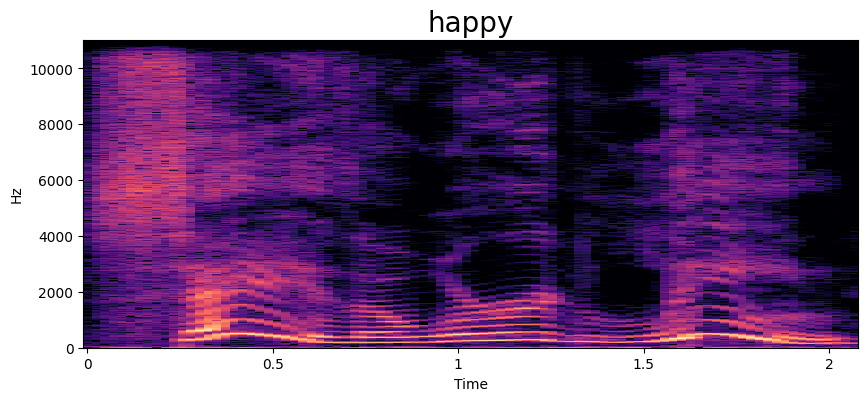

In [12]:
spectogram(data, sample_rate, emotion)

In [13]:
Audio(path)

In [14]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [15]:
extract_mfcc(df["speech"][0])

array([-285.73727   ,   85.78295   ,   -2.1689117 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.41245   ,   -3.0002618 ,
          1.0844985 ,   11.078272  ,  -17.41966   ,   -8.093214  ,
          6.5879736 ,   -4.2209525 ,   -9.15508   ,    3.52148   ,
        -13.186381  ,   14.078851  ,   19.66973   ,   22.725618  ,
         32.57464   ,   16.325033  ,   -3.8427284 ,    0.89629704,
        -11.239264  ,    6.653461  ,   -2.5883696 ,   -7.7140164 ,
        -10.941657  ,   -2.4007552 ,   -5.2812867 ,    4.271157  ,
        -11.202218  ,   -9.024619  ,   -3.6669848 ,    4.8697433 ,
         -1.6027982 ,    2.5600514 ,   11.454374  ,   11.233449  ],
      dtype=float32)

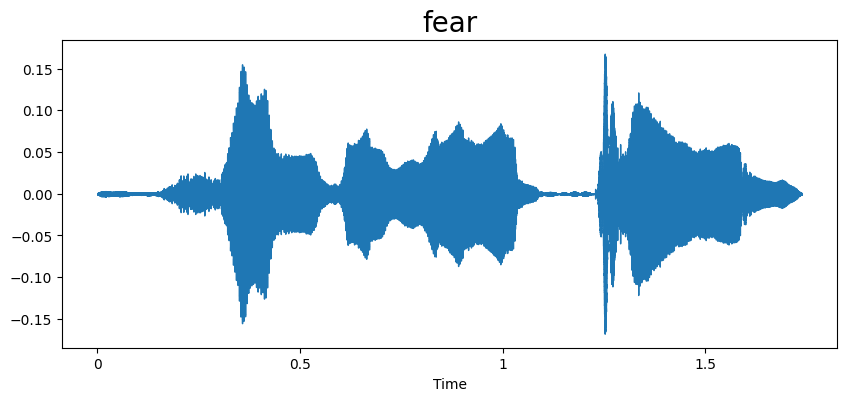

In [19]:
emotion = "fear"
path = df["speech"][df["label"] == emotion].reset_index()["speech"][259]
data, sample_rate = librosa.load(path)

waveplot(data, sample_rate, emotion)

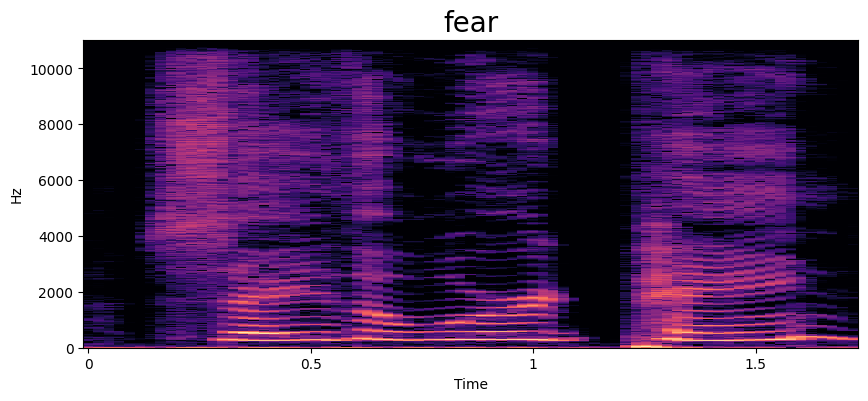

In [20]:
spectogram(data, sample_rate, emotion)

In [21]:
Audio(path)